In [14]:
import numpy as np  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_dropout_model(dropout_rate=0.2):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

dropout_model = create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dropout_history = dropout_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5945 - loss: 0.6730 - val_accuracy: 0.8250 - val_loss: 0.5283
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7982 - loss: 0.5155 - val_accuracy: 0.8350 - val_loss: 0.4492
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.4442 - val_accuracy: 0.8550 - val_loss: 0.3915
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8494 - loss: 0.3954 - val_accuracy: 0.8500 - val_loss: 0.3694
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.3366 - val_accuracy: 0.8550 - val_loss: 0.3577
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8749 - loss: 0.3232 - val_accuracy: 0.8450 - val_loss: 0.3605
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.3171 - val_accuracy: 0.8600 - val_loss: 0.3518
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3414 - val_accuracy: 0.8600 - val_loss:

In [13]:
def create_gradient_clip_model(clip_norm=1.0):
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(clipnorm=clip_norm)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

gradient_clip_model= create_gradient_clip_model(clip_norm=1.0)
gradient_clip_history = gradient_clip_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4458 - loss: 0.7335 - val_accuracy: 0.6650 - val_loss: 0.6357
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7910 - loss: 0.5661 - val_accuracy: 0.7950 - val_loss: 0.5264
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8497 - loss: 0.4706 - val_accuracy: 0.8300 - val_loss: 0.4340
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.3686 - val_accuracy: 0.8400 - val_loss: 0.3926
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3145 - val_accuracy: 0.8350 - val_loss: 0.3760
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8717 - loss: 0.2913 - val_accuracy: 0.8450 - val_loss: 0.3700
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8790 - loss: 0.2943 - val_accuracy: 0.8550 - val_loss: 0.3685
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8961 - loss: 0.2594 - val_accuracy: 0.8550 - val_loss:

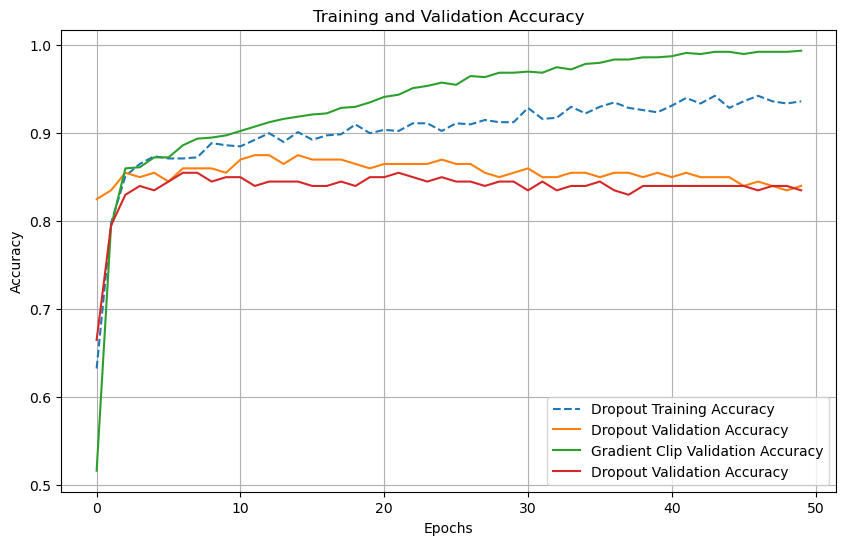

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dropout_history.history['accuracy'], label='Dropout Training Accuracy', linestyle='--')
plt.plot(dropout_history.history['val_accuracy'], label= 'Dropout Validation Accuracy')
plt.plot(gradient_clip_history.history['accuracy'], label='Gradient Clip Validation Accuracy')
plt.plot(gradient_clip_history.history['val_accuracy'], label= 'Dropout Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

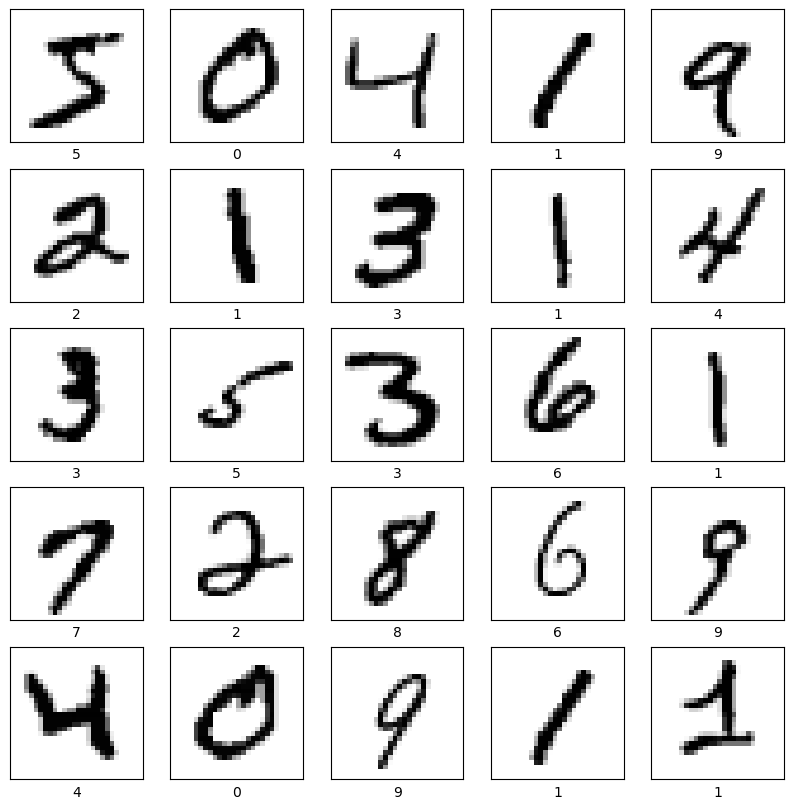

NameError: name 'model' is not defined

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist= keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_parity = np.array([np.sum(np.array(list(map(int, str(y))))) %2 for y in y_train])
y_test_parity= np.array([np.sum(np.array(list(map(int,str(y))))) %2 for y in y_test])
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
outputs_parity = layers.Dense(1, activation='sigmoid')(x)

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'binary_crosser'], metrics=[['accuracy'], ['accuracy']])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, [y_train, y_train_praity], epochs=20, validation_split=0.2, callbacks =[early_stopping])
early_stopping_epoch = np.argmin(history.history['val_loss']) + 1
print("\n\nEarly stopping occured at epoch:", early_stopping_epoch)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.axvline(x=early_stopping_epoch, color='r', linestyle='--', label="Early Stopping")
plt.legend()
plt.show()